In [3]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from collections import deque
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

import warnings
warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv('Telco-Customer-Churn-classification.csv').set_index('customerID')#read the csv

In [3]:
print(df.shape)
df.head()

(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(df.isnull().sum())#Check missing values

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
res=df.replace(to_replace='No phone service',value='No')#replace duplicate values
res=res.replace(to_replace='No internet service',value='No')#replace duplicate values
res.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
lb_make = LabelEncoder()
#Convert the categorial values into dummy variables
res['gender'] = lb_make.fit_transform(res['gender'])
res['Partner'] = lb_make.fit_transform(res['Partner'])
res['Dependents'] = lb_make.fit_transform(res['Dependents'])
res['PhoneService'] = lb_make.fit_transform(res['PhoneService'])
res['MultipleLines'] = lb_make.fit_transform(res['MultipleLines'])
res['InternetService'] = lb_make.fit_transform(res['InternetService'])
res['OnlineSecurity'] = lb_make.fit_transform(res['OnlineSecurity'])
res['OnlineBackup'] = lb_make.fit_transform(res['OnlineBackup'])
res['DeviceProtection'] = lb_make.fit_transform(res['DeviceProtection'])
res['TechSupport'] = lb_make.fit_transform(res['TechSupport'])
res['StreamingTV'] = lb_make.fit_transform(res['StreamingTV'])
res['StreamingMovies'] = lb_make.fit_transform(res['StreamingMovies'])
res['Contract'] = lb_make.fit_transform(res['Contract'])
res['PaperlessBilling'] = lb_make.fit_transform(res['PaperlessBilling'])
res['PaymentMethod'] = lb_make.fit_transform(res['PaymentMethod'])
res['Churn'] = lb_make.fit_transform(res['Churn'])
res.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
5575-GNVDE,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.5,0
3668-QPYBK,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
7795-CFOCW,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [7]:
res = res.convert_objects(convert_numeric=True)#convert all values into numeric

In [8]:
res.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [12]:
res.shape

(7043, 20)

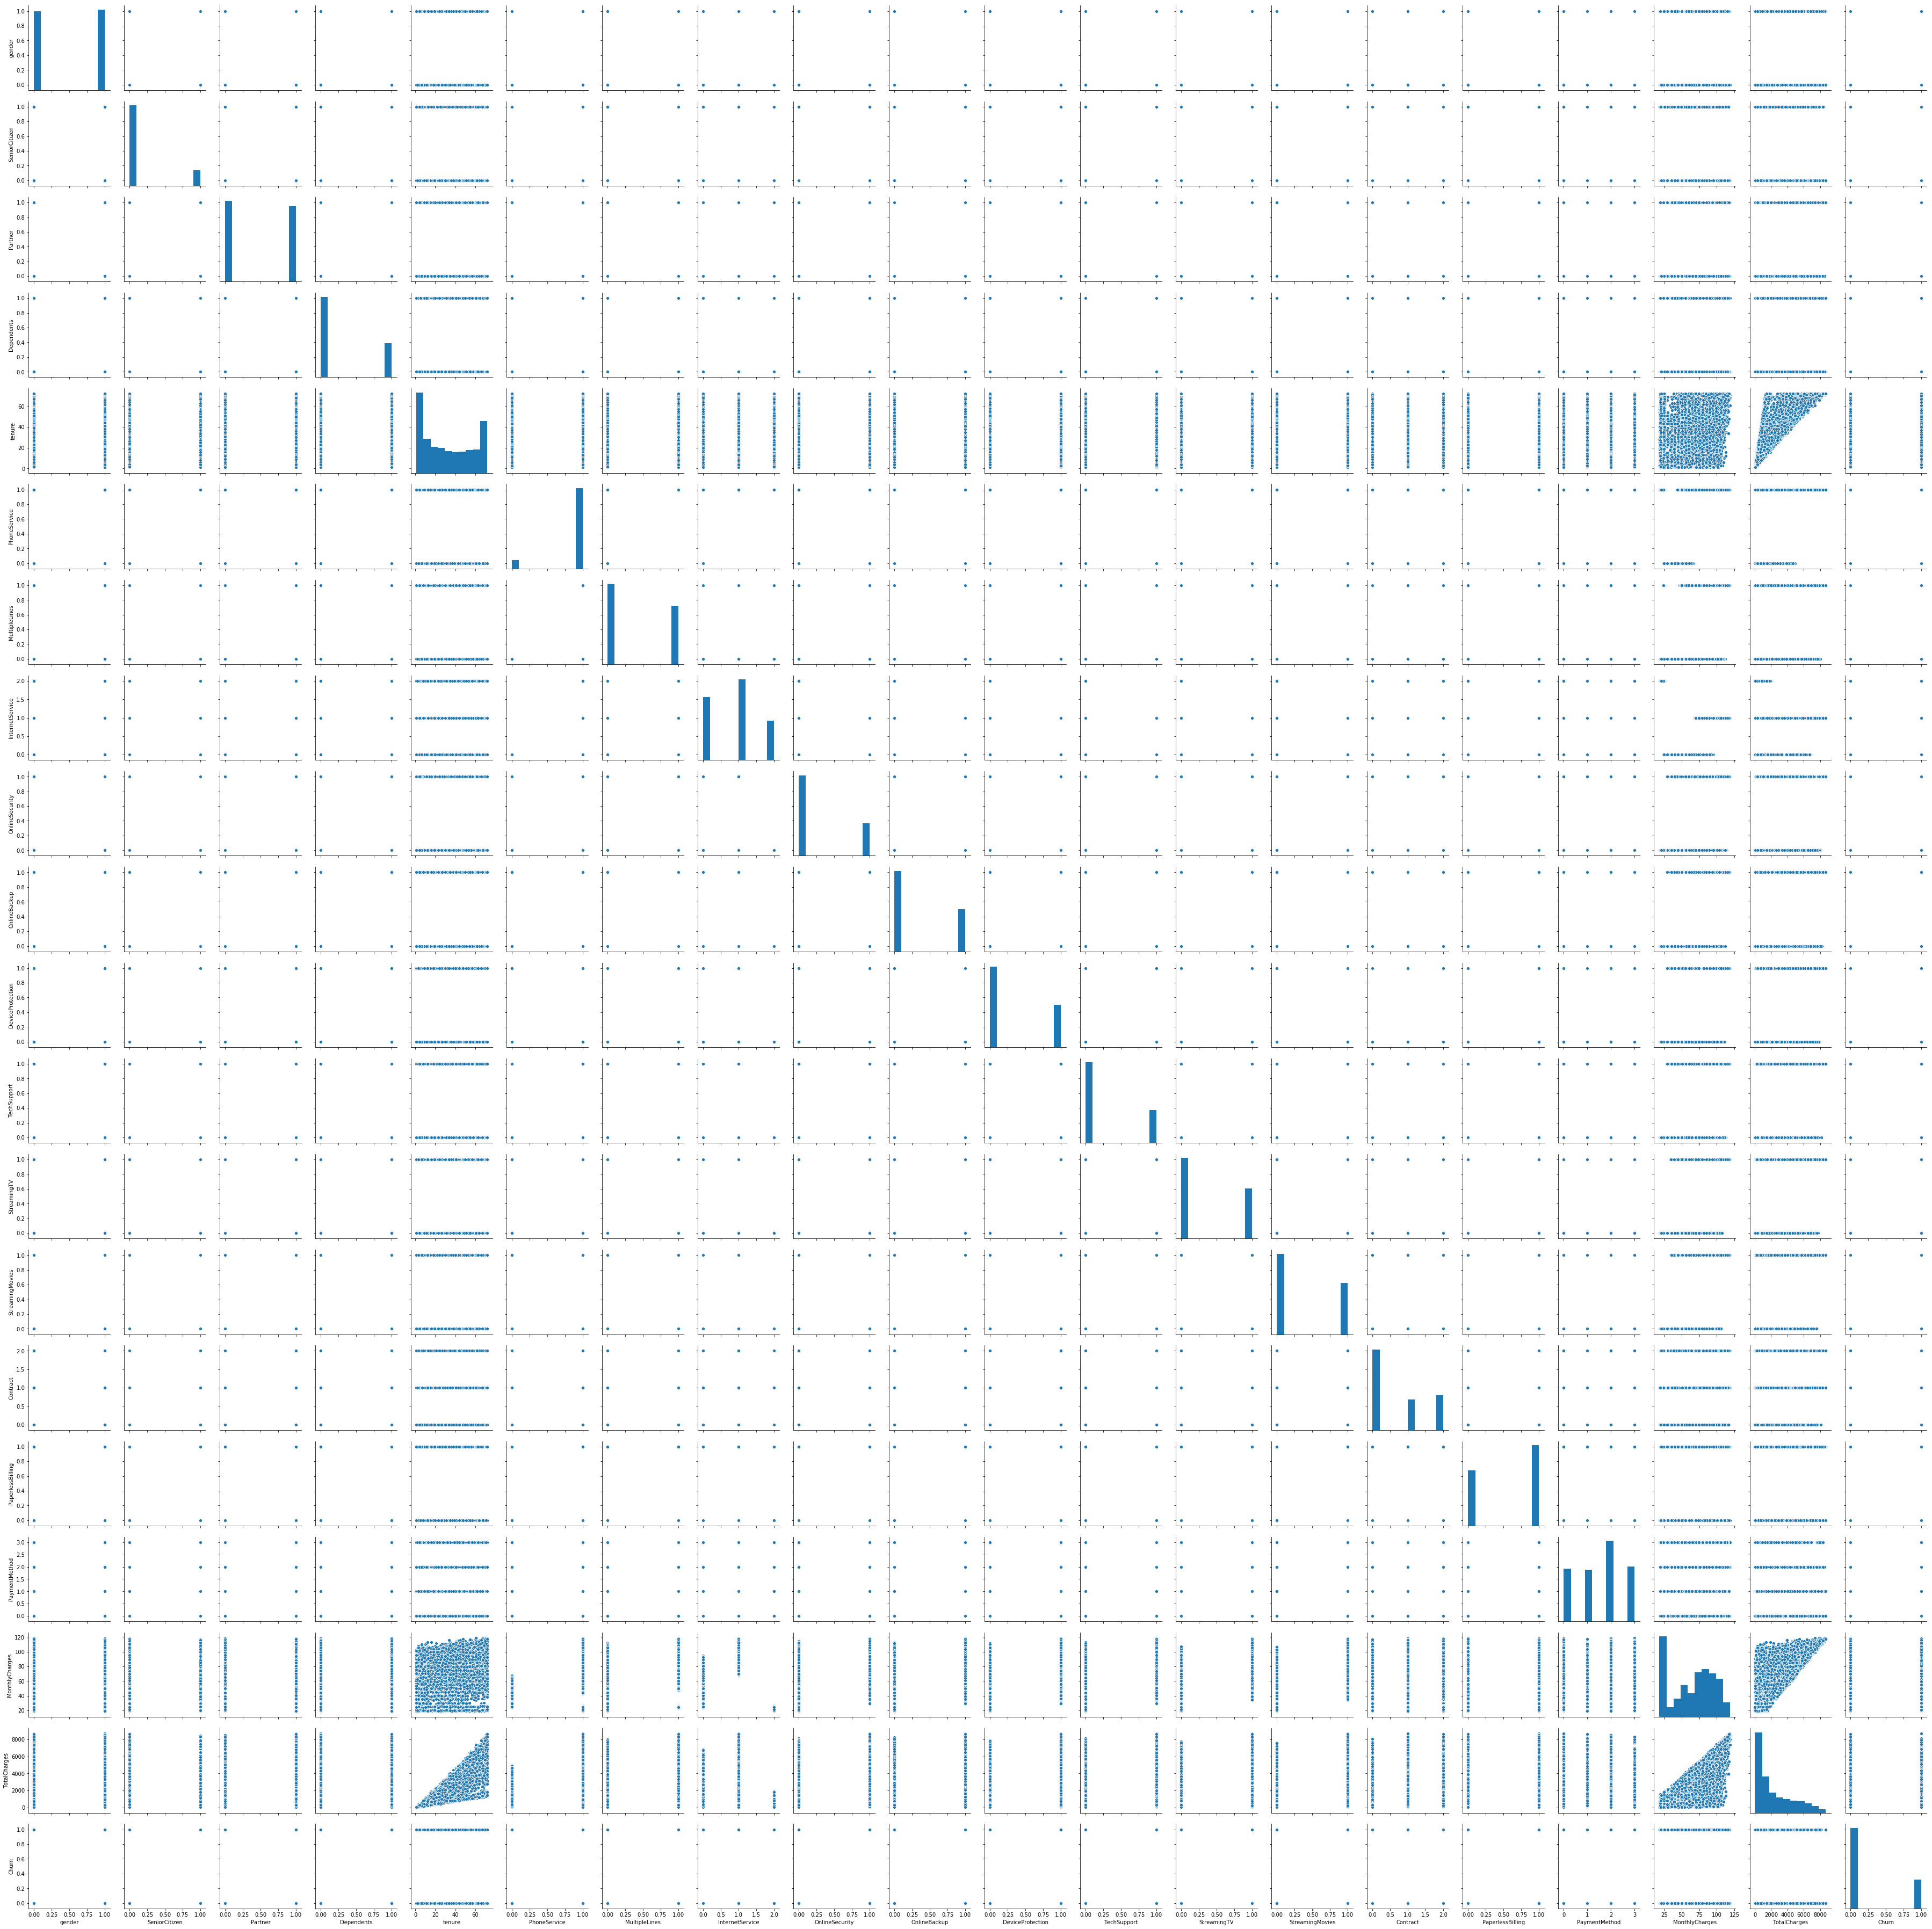

In [35]:
sns.pairplot(res) #vasualize the relationships between different variables

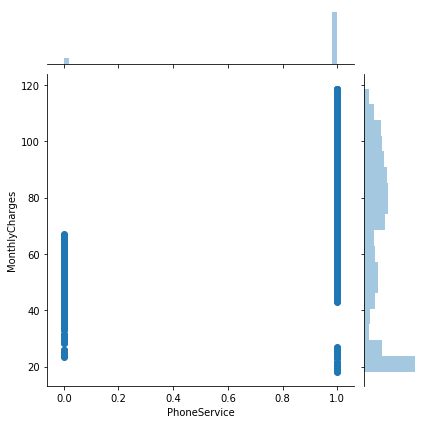

In [13]:
sns.jointplot(x="PhoneService", y="MonthlyCharges", data=res);#see the relationship between phoneservice and monthlycharges

In [14]:
res[(res.PhoneService == 1) & (res.MonthlyCharges < 40)].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7469-LKBCI,1,0,0,0,16,1,0,2,0,0,0,0,0,0,2,0,1,18.95,326.80,0
8191-XWSZG,0,0,0,0,52,1,0,2,0,0,0,0,0,0,1,0,3,20.65,1022.95,0
1680-VDCWW,1,0,1,0,12,1,0,2,0,0,0,0,0,0,1,0,0,19.80,202.25,0
1066-JKSGK,1,0,0,0,1,1,0,2,0,0,0,0,0,0,0,0,3,20.15,20.15,1
7310-EGVHZ,1,0,0,0,1,1,0,2,0,0,0,0,0,0,0,0,0,20.20,20.20,0
9867-JCZSP,0,0,1,1,17,1,0,2,0,0,0,0,0,0,1,0,3,20.75,418.25,0
3957-SQXML,0,0,1,1,34,1,1,2,0,0,0,0,0,0,2,0,1,24.95,894.30,0
3170-NMYVV,0,0,1,1,50,1,0,2,0,0,0,0,0,0,2,0,0,20.15,930.90,0
0731-EBJQB,0,0,1,1,52,1,0,2,0,0,0,0,0,0,1,1,2,20.40,1090.65,0


We can see that the customers who have phoneservice and mothlycharges below $40.00 are allthe customers that do not have the internetservice`

#Relationships between Categorical Variables and Target Variable(Churn)

sns.set(rc={'figure.figsize':(15,8.27)})

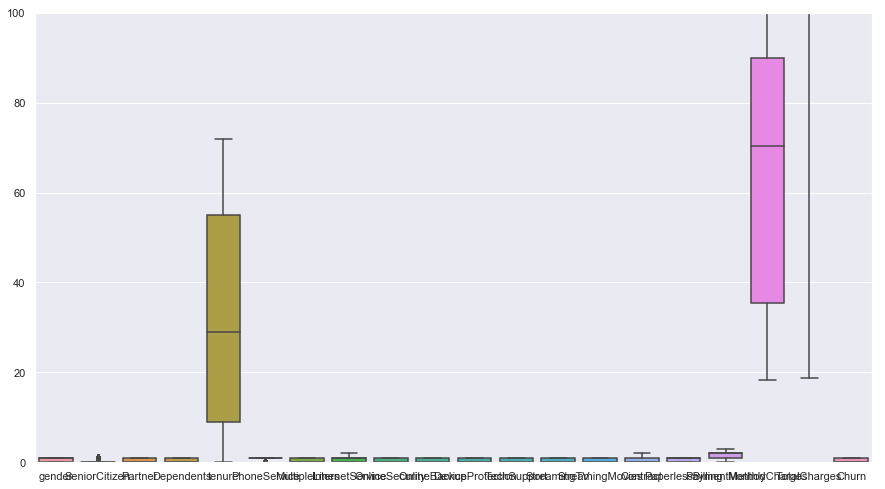

In [16]:
sns.boxplot(data=res)
plt.ylim(0, 100)
plt.show()

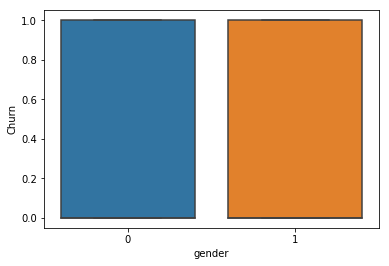

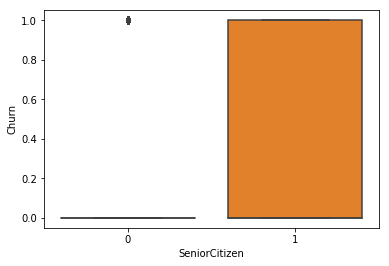

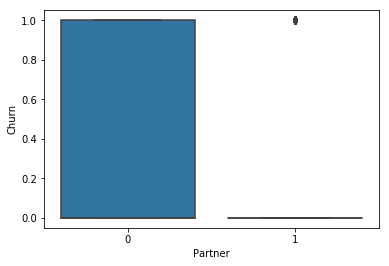

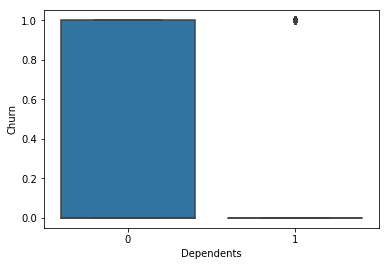

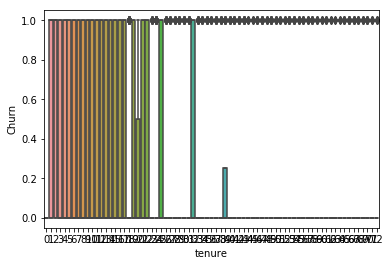

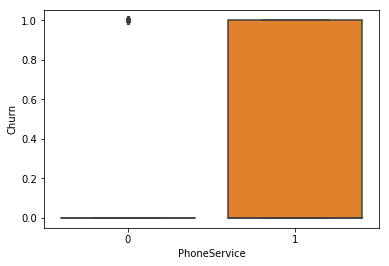

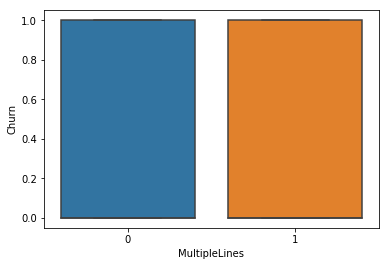

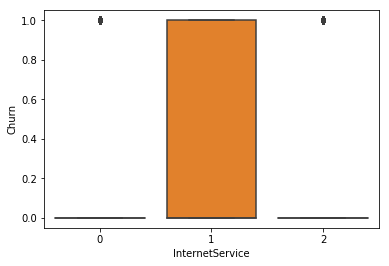

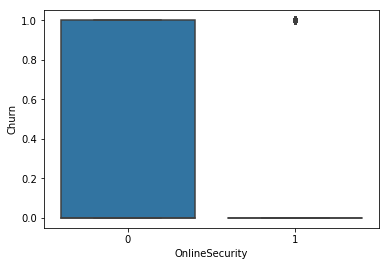

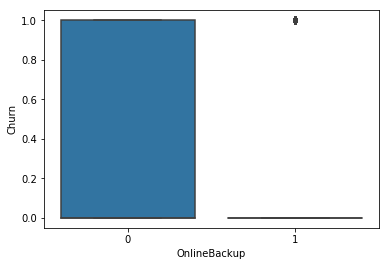

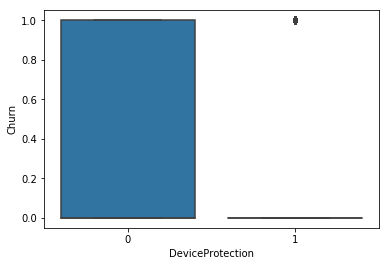

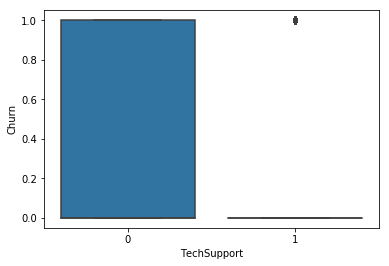

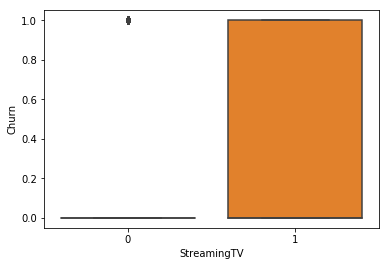

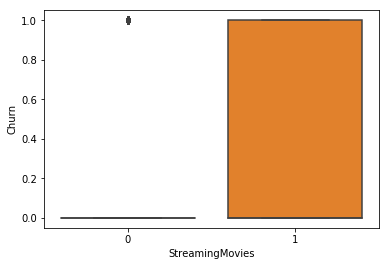

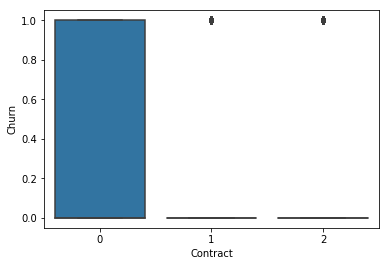

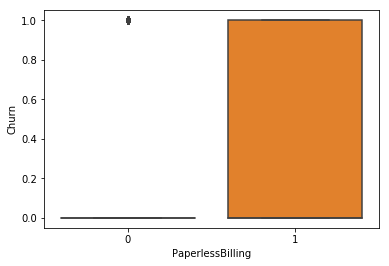

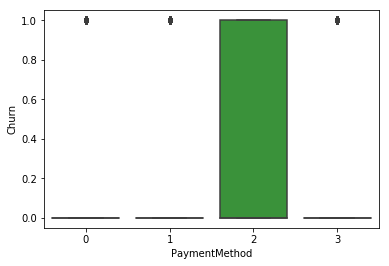

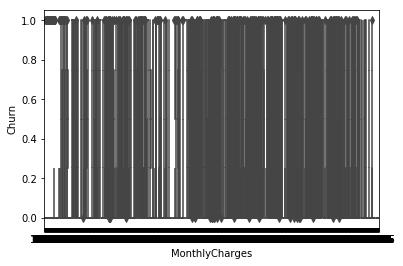

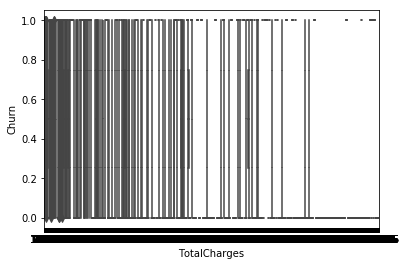

In [15]:
categ_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
              'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
              'PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']
for col in categ_cols:
    sns.boxplot(x=col, y='Churn', data=res)
    plt.show()

#Correlation Coefficients

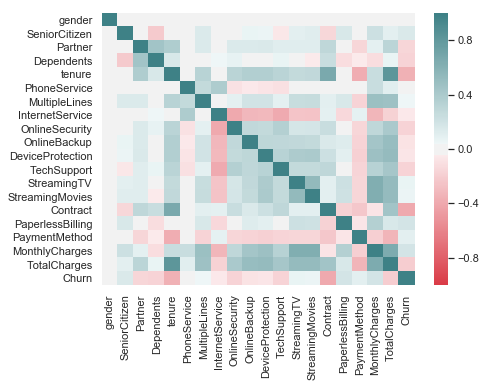

In [17]:
corr = res.corr()
plt.figure(figsize=(7, 5))
colormap = sns.diverging_palette(10, 200, as_cmap=True)
sns.heatmap(corr, vmin=-1,vmax=1,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap=colormap)

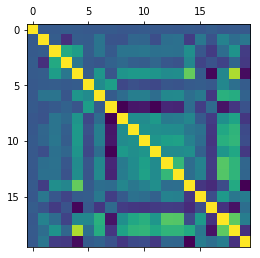

In [17]:
plt.matshow(res.corr())#check the correlation between different varaibles using correlation matrix

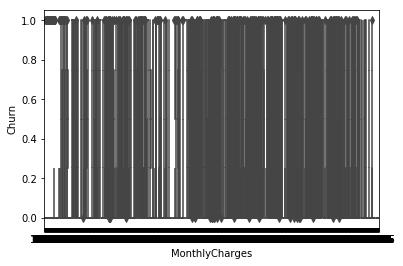

In [18]:
sns.boxplot(x='MonthlyCharges', y='Churn', data=res)
plt.show()

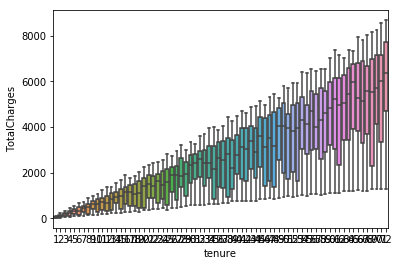

In [37]:
sns.boxplot(x='tenure', y='TotalCharges', data=res)
plt.show()

In [19]:
res.dropna(inplace=True)

In [20]:
res.shape

(7032, 20)

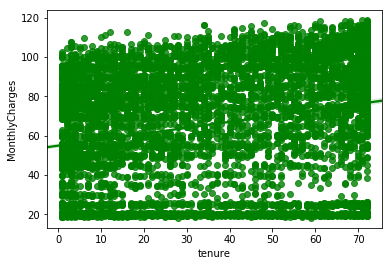

In [21]:
sns.regplot(x='tenure',y='MonthlyCharges',data=res,color='g',scatter=True)

In [22]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7032 non-null int64
SeniorCitizen       7032 non-null int64
Partner             7032 non-null int64
Dependents          7032 non-null int64
tenure              7032 non-null int64
PhoneService        7032 non-null int64
MultipleLines       7032 non-null int64
InternetService     7032 non-null int64
OnlineSecurity      7032 non-null int64
OnlineBackup        7032 non-null int64
DeviceProtection    7032 non-null int64
TechSupport         7032 non-null int64
StreamingTV         7032 non-null int64
StreamingMovies     7032 non-null int64
Contract            7032 non-null int64
PaperlessBilling    7032 non-null int64
PaymentMethod       7032 non-null int64
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null int64
dtypes: float64(2), int64(18)
memory usage: 1.1+ MB


In [23]:
print(res.isnull().sum())
res.dtypes

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [24]:
x=res[categ_cols]
y=res[['Churn']]

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)#split the train and test set in ratio of 4:1

In [26]:
LR=LogisticRegression().fit(x_train,y_train)
LR.score(x_test,y_test)

0.8173418621179815

In [28]:
KNN=KNeighborsClassifier().fit(x_train,y_train)
KNN.score(x_test,y_test)

0.7505330490405118

In [29]:
NB=GaussianNB().fit(x_train,y_train)
NB.score(x_test,y_test)

0.7725657427149965

In [30]:
LDA=LinearDiscriminantAnalysis().fit(x_train,y_train)
LDA.score(x_test,y_test)

0.8059701492537313

In [31]:
RF=RandomForestClassifier().fit(x_train,y_train)
RF.score(x_test,y_test)

0.7803837953091685

In [32]:
ADB=AdaBoostClassifier().fit(x_train,y_train)
ADB.score(x_test,y_test)

0.8088130774697939

In [33]:
QDA=QuadraticDiscriminantAnalysis().fit(x_train,y_train)
QDA.score(x_test,y_test)

0.7704335465529495